In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[" "])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# Exploratory Data Analysis

## Missing Data

I am using seaborn to create a simple heatmap to see where we are missing data!

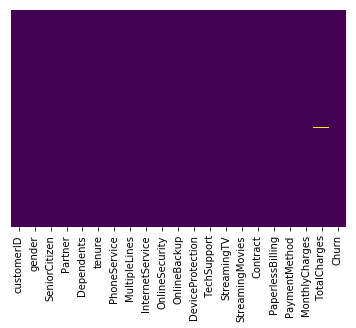

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since only 11 values are missing from TotalCharges column which is negligible compared to dataset, I will drop these 'na' values

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values are present in the dataset now

CustomerID is not important to me.Hence I am dropping the column

In [8]:
data.drop(['customerID'],axis=1,inplace=True)

In [9]:
data['SeniorCitizen']=pd.Categorical(data['SeniorCitizen'])

Analyzing the numeric columns and object columns seperately

In [10]:
numeric_types = ['float64','int64']
data_numeric = data.select_dtypes(include=numeric_types)
data_objects = data.select_dtypes(exclude=numeric_types)

In [11]:
data_numeric.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
data_objects.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


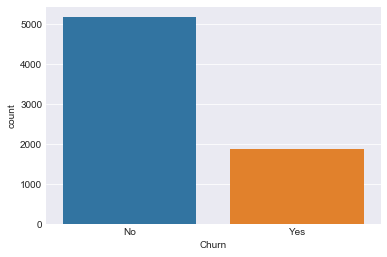

In [13]:
sns.set_style('darkgrid')
sns.countplot(data['Churn'])

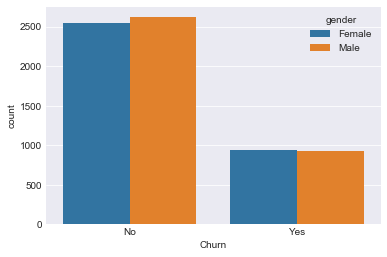

In [14]:
sns.countplot(x='Churn',hue='gender',data=data)

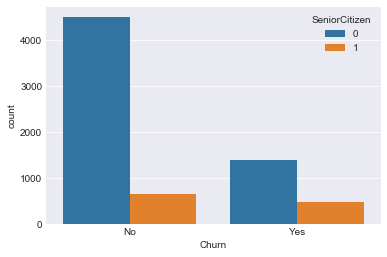

In [15]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=data)

[]

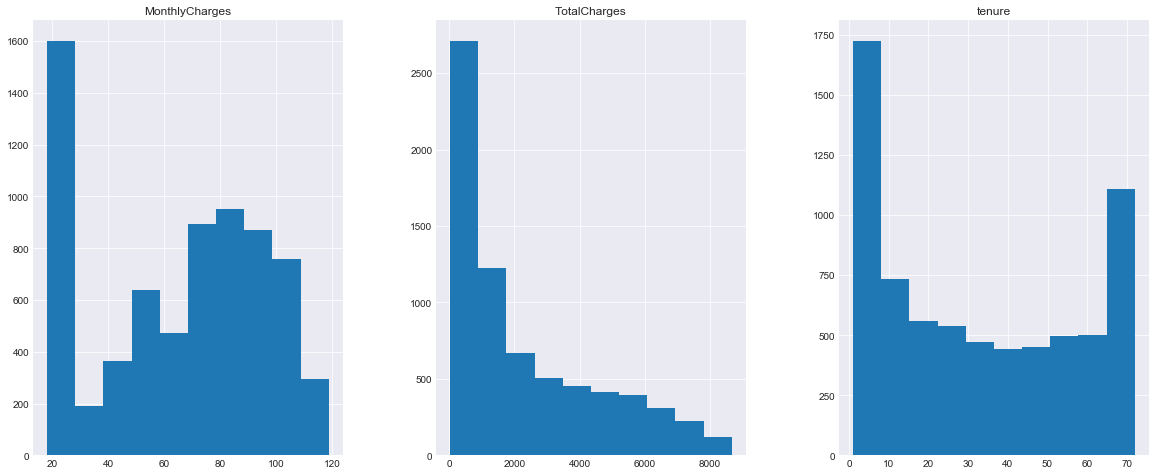

In [16]:
data_numeric.hist(layout=(1,3), figsize=(20,8))
plt.plot()

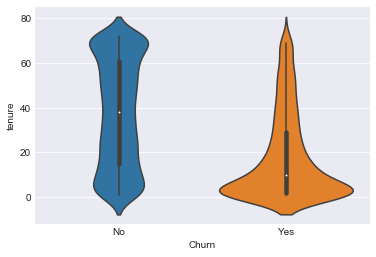

In [17]:
sns.violinplot(x="Churn", y="tenure", data=data)

Categorizing the tenure column into Low(0-20) ,Medium(21-60) and High(61-80) for analyzing where the Churn is more

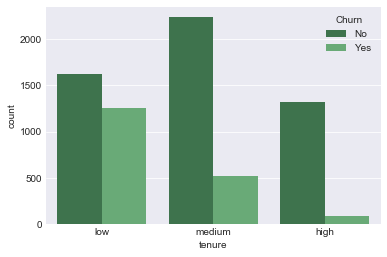

In [18]:
tenure_bins=pd.cut(data["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=data, palette="Greens_d")

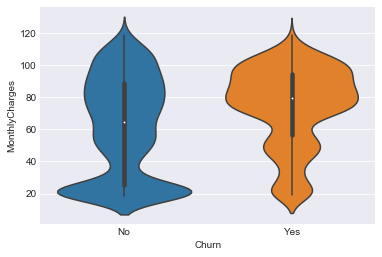

In [19]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=data)

Categorizing the MonthlyCharges column into Low(0-35) ,Medium(36-60) and High(61-130) for analyzing where the Churn is more

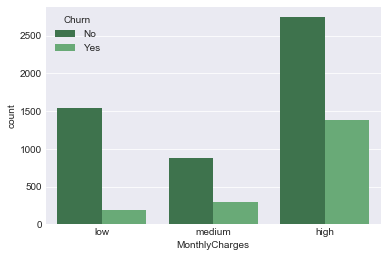

In [20]:
MonthlyCharges_bins=pd.cut(data["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=data, palette="Greens_d")

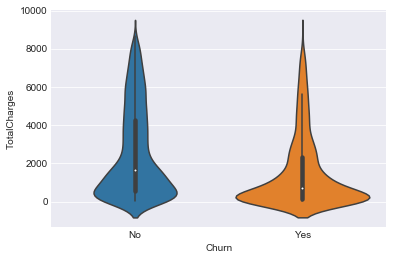

In [21]:
sns.violinplot(x="Churn", y="TotalCharges", data=data)

Categorizing the TotalCharges column into Low(0-1000) ,Medium(1001-4000) and High(4001-10000) for analyzing where the Churn is more

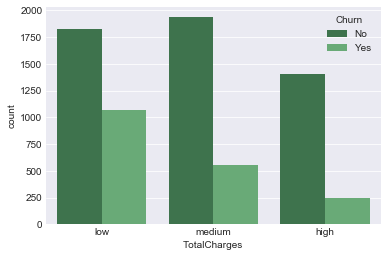

In [22]:
TotalCharges_bins=pd.cut(data["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=data, palette="Greens_d")

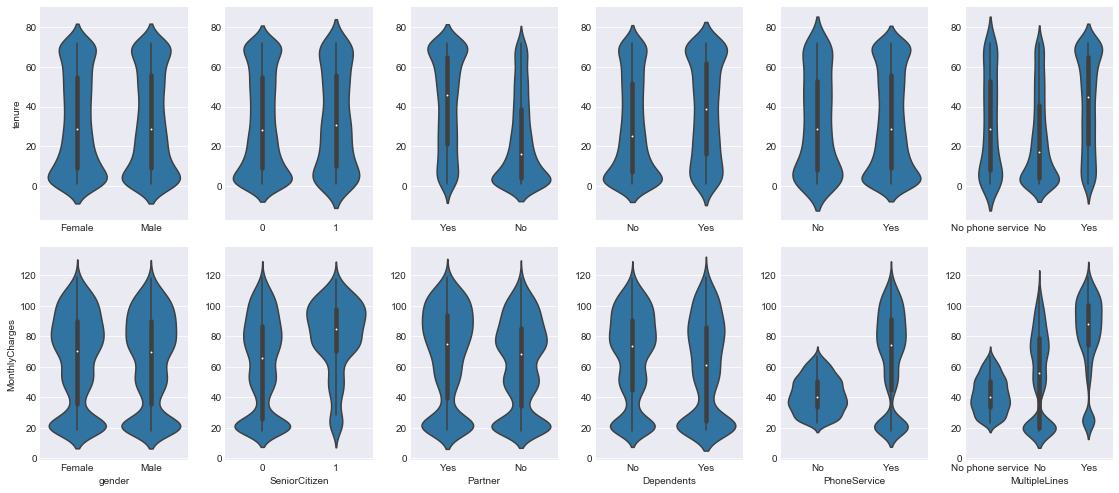

In [23]:
g = sns.PairGrid(data, x_vars=data_objects.columns[0:6].values,
    y_vars=data_numeric.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

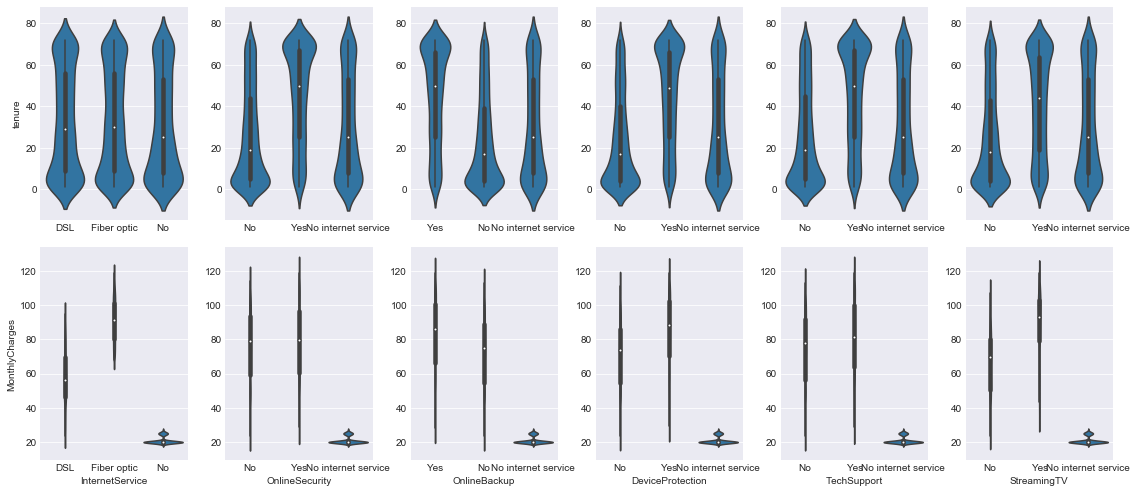

In [24]:
g = sns.PairGrid(data, x_vars=data_objects.columns[6:12].values,  
    y_vars=data_numeric.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

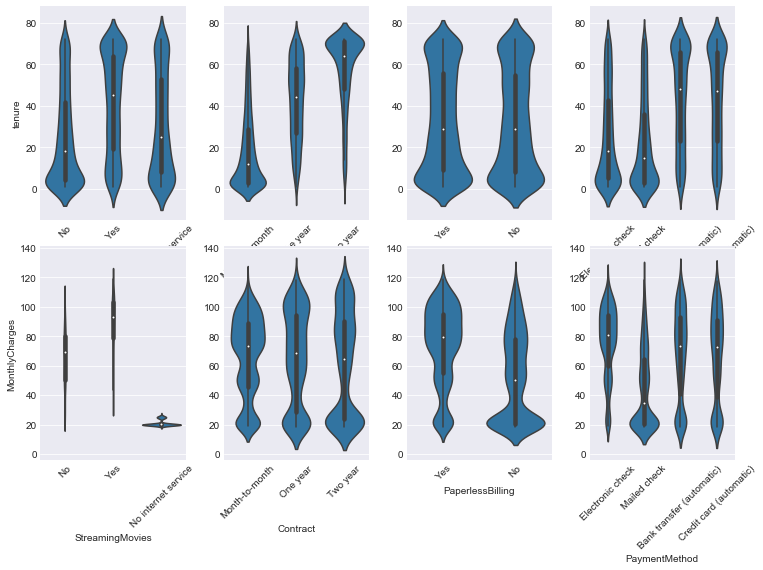

In [25]:
g = sns.PairGrid(data, x_vars=data_objects.columns[12:16].values,
    y_vars=data_numeric.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
g.map(sns.violinplot)

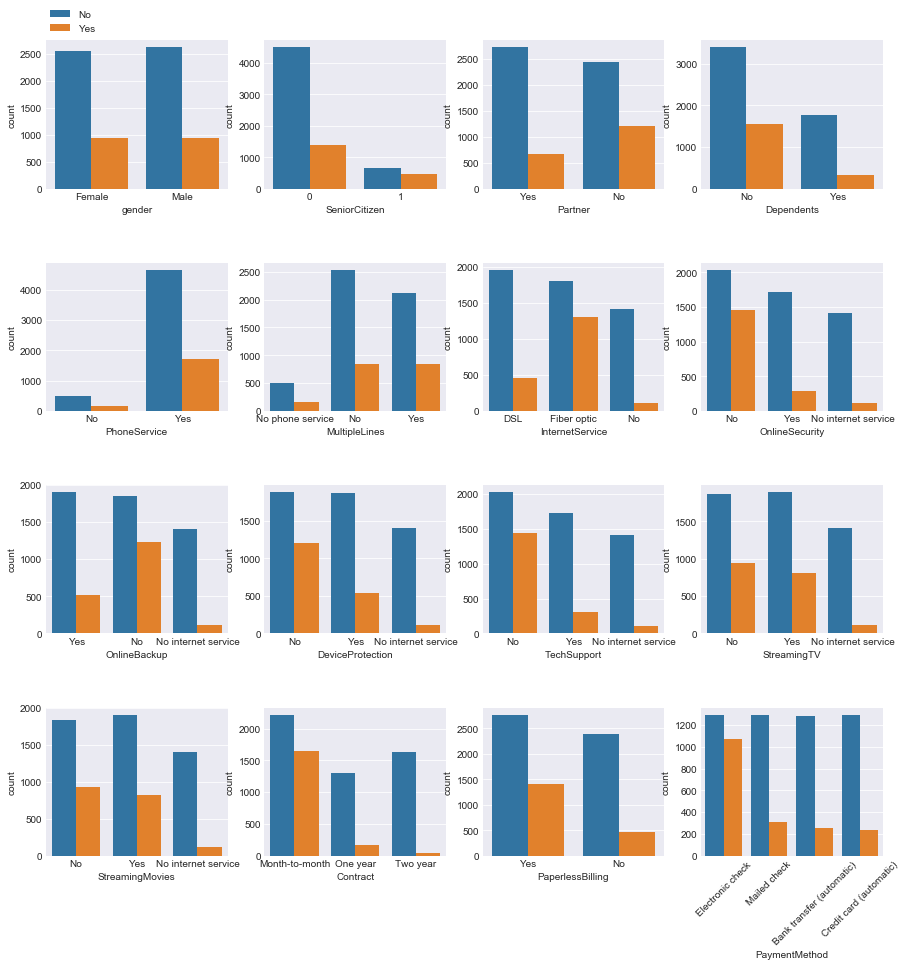

In [26]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=data_objects.iloc[:,i], hue=data_objects["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

## Converting Categorical Features 

In [27]:
data_cat = data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
data_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [28]:
dummy = pd.get_dummies(data_cat)
dummy.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [29]:
data_final = pd.concat([dummy,data.drop(data_cat.columns.tolist(),axis=1)],axis=1)
data_final.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,0,1,29.85,29.85
1,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,2,53.85,108.15
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,45,42.30,1840.75
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,1,2,70.70,151.65


Our data is ready for our model

# Building a Logistic Regression model

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_final.drop(['Churn_Yes','Churn_No'],axis=1), 
                                                    data_final['Churn_Yes'], test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
print('R-squared score (training): {:.5f}'.format(logmodel.score(X_train, y_train)))
print('R-squared score (test): {:.5f}'.format(logmodel.score(X_test, y_test)))

R-squared score (training): 0.80313
R-squared score (test): 0.80664


## Evaluation

##### Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1580
          1       0.63      0.55      0.59       530

avg / total       0.80      0.81      0.80      2110



##### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[1412  168]
 [ 240  290]]


### Overall, our classifier is 80.6% accurate